<a href="https://colab.research.google.com/github/2001rabista/EDA-CAPSTONE-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
# The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.

Discussion of Google play store dataset will involve various steps such as
1. loading the data into the data frame
2. cleaning the data
3. extracting statistics from the dataset
4. exploratory analysis and visualizations
5. questions that can be asked from the dataset
6. conclusion 

# **Step 1: Loading Dataset And Creating DataFrame**

In [ ]:
# Importing all the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the file path
file_path = '/content/drive/MyDrive/EDA_Capstone/Play Store Data.csv'

In [ ]:
# Creating data frame
df = pd.read_csv(file_path)

In [ ]:
# Getting first 5 rows and all columns
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Getting last 5 rows and all columns
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Checking the shape of dataset
df.shape

(10841, 13)

In [ ]:
# Getting information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Here we can see columns with there datatypes and also count of non null values. Also giving the information about how many rows and columns are present in data set

# **Step 2: Cleaning the DataFrame**

In [ ]:
# Checking all columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Droping irrelevant columns
df.drop(['Last Updated','Current Ver'], axis=1, inplace=True )

In [ ]:
# Checking wheater columns are dropped or not
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Android Ver'],
      dtype='object')

In [ ]:
# Drop if there are any duplicate in dataset
df.drop_duplicates(inplace=True)

In [ ]:
# Check Shape after dropping duplicate
df.shape

(10356, 11)

In [ ]:
# Checking the Null Value
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Android Ver          3
dtype: int64

# We can see from above code that there is some null values are present in the dataset, so we have to deal with null values

In [ ]:
# We cannot put zero for replacing null so we will check its stats
df.describe()

,Rating
count,8891.000000
mean,4.189551
std,0.545512
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# Replacing null values with median of rating
df['Rating'].fillna((df['Rating'].median()), inplace=True)

In [ ]:
# Checking unique values in Rating columns
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# Dropping the 1.9 from category 
df.drop(df.loc[df['Category']=='1.9'].index, inplace=True)

In [ ]:
# Checking the category after dropping 1.9
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# Checking the install column for any improper values
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# Dropping + and converting values to int
df=df[df['Installs']!='Free']
df['Installs']=df['Installs'].apply(lambda x : x.replace("+","") if "+" in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
df["Installs"] = pd.to_numeric(df["Installs"])

In [ ]:
# Checking install columns unique value
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10355, dtype: int64

In [ ]:
# Checking Price Columns
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Removing $ symbol and converting to numerical
df['Price']=df['Price'].apply(lambda x : x.replace("$","") if "$" in str(x) else x)
df["Price"] = pd.to_numeric(df["Price"])

In [ ]:
# Checking Price Columns after Altering
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
# Checking the size columns
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Convrting MB and Kb Values to float
try:
    df['Size']=df['Size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
    df['Size']=df['Size'].apply(lambda x:  float(x))
except BaseException as be:
    print("Check it again",be)

In [ ]:
# Confirming the Size Column
df['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [ ]:
# Convert reviews column to numerical
df["Reviews"] = pd.to_numeric(df["Reviews"])

In [ ]:
# Checking Review Column after convesion
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

# Step 3. Extracting statistics from the dataset

In [ ]:
# Global size and color define for visualization
import plotly.express as px
from seaborn import colors
sns.set_style('darkgrid')
colors = sns.color_palette('deep')
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)    
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)  


# (A) Univarent Analysis

In [ ]:
# Getting the stastical data 
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10355.000000,1.035500e+04,8829.000000,1.035500e+04,10355.000000
mean,4.203747,4.059634e+05,21.289428,1.415856e+07,1.031000
std,0.485640,2.697035e+06,22.542040,8.024728e+07,16.280191
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,4.700000,1.000000e+03,0.000000
50%,4.300000,1.677000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,4.636100e+04,29.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Here using the describe method we got to see the stats of the dataset.We can see the mean mode median max and min of all the numerical features

<Figure size 864x576 with 0 Axes>

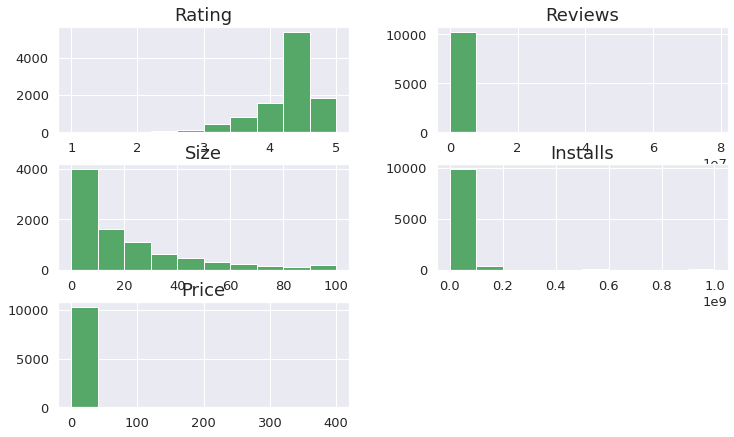

In [ ]:
# Let's check the skeness of data.
plt.figure(figsize=(12,8), tight_layout=True)
df.hist(color=sns.color_palette('deep')[2])
plt.show()


# Rating feature skewed to right so we have to use median instead of mean, for size data seems to skewed to left so the mean will be lower than the median for size feature.

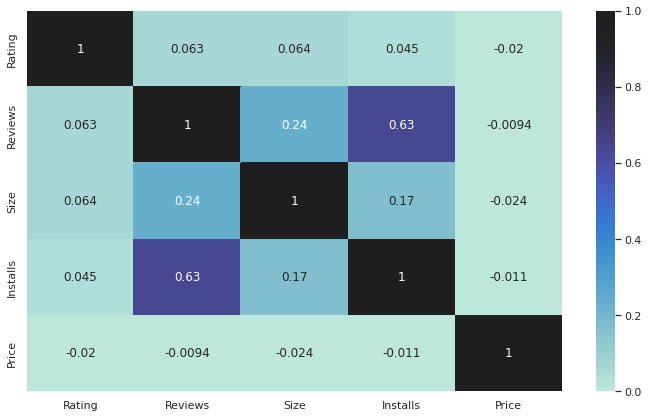

In [ ]:
# Chexking the Corelation 
import seaborn as sns; sns.set_theme()
sns.heatmap(df.corr(),annot=True,center=True,cbar=True,vmin=0,vmax=1)
sns.set(rc={'figure.figsize':(16,7)})
plt.show()

# Reviews vs install: We have experienced from the seaborn heatmap that reviews on the google play store are highly correlated with the rate of installation. 

# Step 4: Exploratory Data Analysis

# (B) Bivariate data 

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

 Getting Total Application in each category 

In [ ]:
# Getting total apps in each category
category = df.groupby('Category')['App'].count().reset_index().sort_values(by='App',ascending=False)

In [ ]:
# Checking its columns
print(category.head(2))

   Category   App
11   FAMILY  1943
14     GAME  1121


In [ ]:
# Writing code for plotting bar graph
px.bar(data_frame = category,x = category['Category'],y = category['App'],text ='App',title ='Total Application in each Category', color = 'Category' )

# The above count plot is the evidence that category family has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. We can see the people does not reliay on apps for parenting and beauty.And for the comics the category is very saturated.

Geting Percentage Install in each category

In [ ]:
# Geting Percentage Install in each category
cat_install = df.groupby('Category',as_index = False)['Installs'].sum().sort_values(by = 'Installs', ascending = False )
total_install = df['Installs'].sum()
cat_install['percentage_installs']=cat_install['Installs']*100/total_install
cat_install.head()

,Category,Installs,percentage_installs
14,GAME,31544024415,21.515321
6,COMMUNICATION,24152276251,16.473611
27,SOCIAL,12513867902,8.535369
25,PRODUCTIVITY,12463091369,8.500736
29,TOOLS,11442771915,7.804804


In [ ]:
# Applying lambda function for proper formatting of values inside percentage installs upto 1 float point decimal
cat_install['percentage_installs']=cat_install['percentage_installs'].apply(lambda x: "{0:1.2f}%".format(x))

In [ ]:
# Plotting Graph
px.bar(data_frame=cat_install,x="Category",y="Installs",text='percentage_installs',color='Installs',
       title='Most Installed Category in Percentage Installs (Categories Vs Installs)')

# On the right-hand side of the above bar plot, there is scale available installs, which we can relate with the heatmap giving the visulaiztion of total install in Billions, It's interesting right, Now we can easily interpret that the game category has the highest percentage of installs that is 20.93% around 21% and second highest is communication have 19.48% percentage installs.

Category vs Review

In [ ]:
# Geting Percentage Review in each category
cat_review = df.groupby('Category',as_index = False)['Reviews'].sum().sort_values(by ='Reviews', ascending = False)
total_review = df['Reviews'].sum()
cat_review['percentage_reviews']= cat_review['Reviews']*100/total_review
cat_review.head()

,Category,Reviews,percentage_reviews
14,GAME,1415536650,33.673177
6,COMMUNICATION,601273552,14.303261
27,SOCIAL,533576829,12.692873
11,FAMILY,396771969,9.438521
29,TOOLS,273050841,6.495409


In [ ]:
# Applying lambda function for proper formatting of values inside percentage review upto 1 float point decimal
cat_review['percentage_reviews']=cat_review['percentage_reviews'].apply(lambda x: "{0:1.2f}%".format(x))

In [ ]:
# Plotting Graph
px.bar(data_frame=cat_review,x="Category",y="Reviews",text='percentage_reviews',color='Reviews',
       title='Most Installed Category in Percentage Reviews (Categories Vs Reviews)')

# As we can check gaming category have highest percentage reviews, The second highly reviewed category is communication. For events category there are almost no reviews, second least reviewed category beauty. So gamers and people using communication are pretty much expresive about the performance of the app.

Content rating Vs Installs

In [ ]:
# Which Content rating applications are being downloaded most.
px.bar(data_frame=df,x='Content Rating',y='Installs',color='Content Rating',title='Content rating Vs Installs')

# Applications which has content rating for everyone are installed mostly

Number of in Application each Genres

In [ ]:
 # Number application in each genres
genres_app = df.groupby('Genres')['App'].count().reset_index().sort_values(by ='App',ascending = False).head(10)

In [ ]:
# Plotting Graphs
px.bar(data_frame = genres_app , x = 'Genres', y ='App' ,color='Genres', title = 'Number of in Application each Genres')

# From the above countplot we can see the tools genres has the most number of applications, we can see the total number of application in top 10 genres.

Reviews vs Rating

In [ ]:
#reviews vs rating
reviews_ratting = df[df['Reviews']<100000]


In [ ]:
# Plotting Scatter 
px.scatter(data_frame=reviews_ratting,x='Reviews',y='Rating',trendline='ols',color='Rating',
           title='Scatter Plot With Trendline Represents Reviews Vs Rating',text='Rating')

# Obviously, by looking at the above scatter plot with trendline we are able to conclude that lesser the reviews on applications lesser the rating as well.

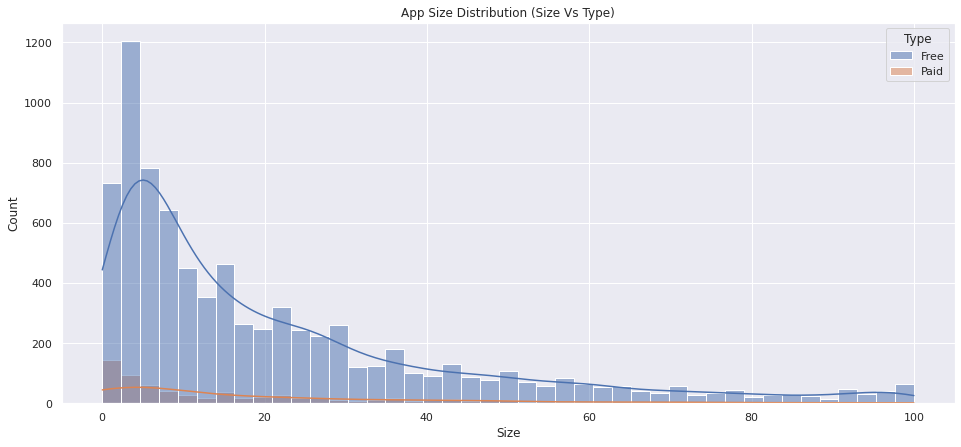

In [ ]:
# Plotting graph for Size vs Type of Application
sns.histplot(data=df, x='Size',hue='Type',kde=True)
plt.title("App Size Distribution (Size Vs Type)")
sns.set(rc={'figure.figsize':(12,8)})
plt.show()

# By observing the above histogram with KDE (Kernal density estimation) KDE line for paid type applications represented in orange color whereas sky-blue colored KDE line for the free type applications we are able to draw a conclusion that there are maximum number of applications whose range of size is between 0 to 25 or 30 Mb.

# The size of the application has a considerable impact on the performance and space and power consumption of the device. So it is advisable to keep the size of the application optimized

# Data of reviews given by the end-users

In [ ]:
# Getting the file directory path from google drive
path = '/content/drive/MyDrive/Module 1/EDA CAPSTON/ User Reviews.csv'

In [ ]:
# Defining dataframe as user_review
user_review_df=pd.read_csv(path)

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up


In [ ]:
# Merging user reviews df with play store file df on the basis of common feature app
merged_df=df.merge(user_review_df,on='App')
merged_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [ ]:
# Checking hte shape of merged dataframe
merged_df.shape

(100219, 15)

In [ ]:
# Checking info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100219 entries, 0 to 100218
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     100219 non-null  object 
 1   Category                100219 non-null  object 
 2   Rating                  100219 non-null  float64
 3   Reviews                 100219 non-null  int64  
 4   Size                    64248 non-null   float64
 5   Installs                100219 non-null  int64  
 6   Type                    100219 non-null  object 
 7   Price                   100219 non-null  float64
 8   Content Rating          100219 non-null  object 
 9   Genres                  100219 non-null  object 
 10  Android Ver             100219 non-null  object 
 11  Translated_Review       59163 non-null   object 
 12  Sentiment               59171 non-null   object 
 13  Sentiment_Polarity      59171 non-null   float64
 14  Sentiment_Subjectivi

In [ ]:
# Checking null values inside the dataframe.
merged_df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                      35971
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Android Ver                   0
Translated_Review         41056
Sentiment                 41048
Sentiment_Polarity        41048
Sentiment_Subjectivity    41048
dtype: int64

In [ ]:
# Dropping null Values
merged_df.dropna(axis = 0 , inplace=True)

# Sentiment subjectivity distribution

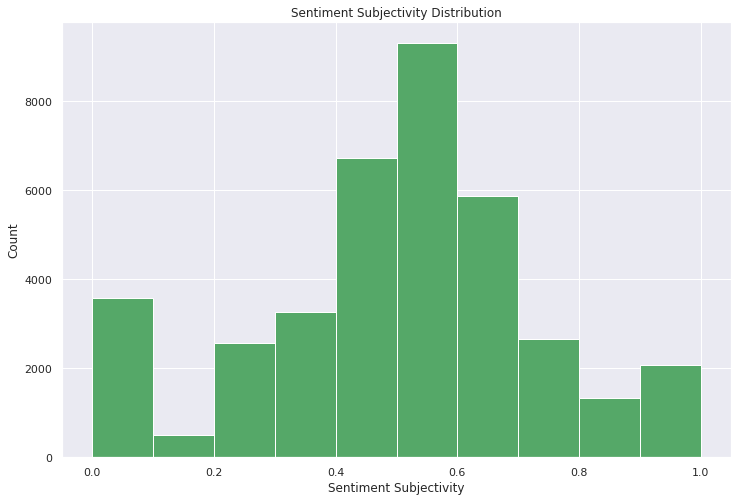

In [ ]:
# Plotting the histogram for sentiment subjectivity distribution
plt.hist(data=merged_df, x='Sentiment_Subjectivity', color = sns.color_palette('deep')[2] )
plt.title("Sentiment Subjectivity Distribution")
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Count")
sns.set(rc={'figure.figsize':(12,7)})
plt.show()

# From above distribution of subjectivity it can be conclude that Most possible sentiment subjectivity ranges from 0.4 to 0.7. So it can be stated that customers gives reviews as per their experience with service of the applications.

# Sentiments distribution

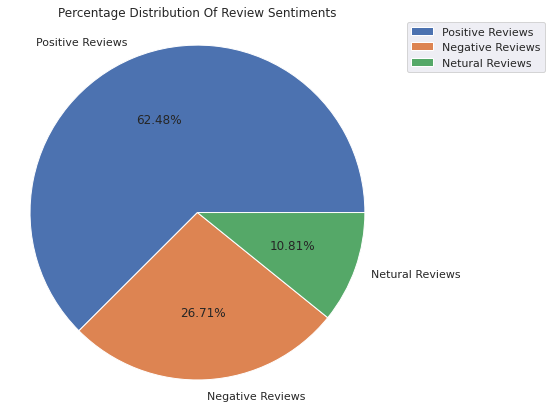

In [ ]:
# Plotting the histogram for Sentiments distribution
sentiment_count=merged_df['Sentiment'].value_counts().to_list()

labels=['Positive Reviews','Negative Reviews',"Netural Reviews"]

plt.pie(x=sentiment_count,labels=labels,autopct="%.2f%%",radius=1.1)

plt.title("Percentage Distribution Of Review Sentiments")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()
sns.set(rc={'figure.figsize':(18,8)})


# From the above pie chart, it can easily be understood that there is around 63% of user reviews sentiment is positive, around 27% of reviews sentiment is negative and the remaining around 11% of reviews sentiment is neutral.

# Sentiment polarity subjectivity distribution

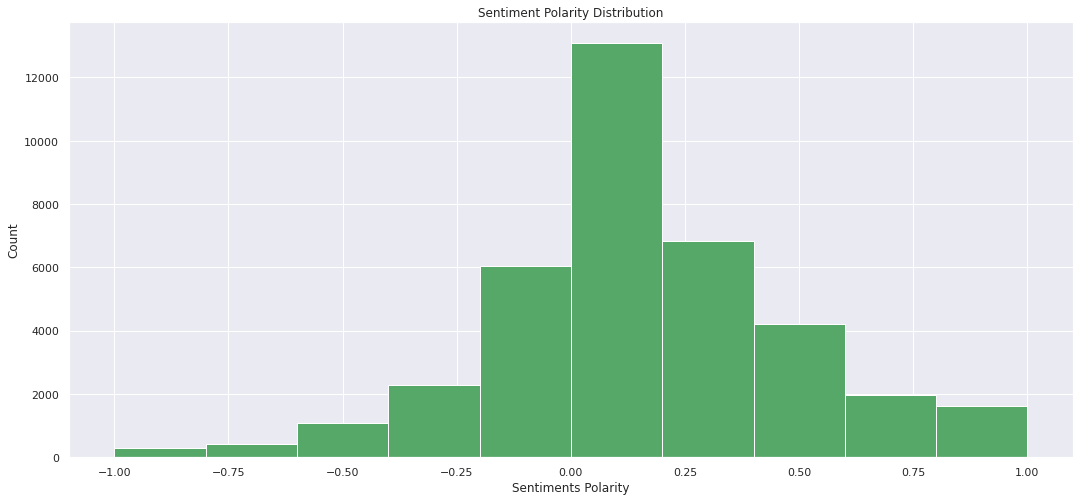

In [ ]:
# Plotting the histogram for sentiment polarity subjectivity distribution
plt.hist(data=merged_df, x='Sentiment_Polarity', color = sns.color_palette('deep')[2] )
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiments Polarity")
plt.ylabel("Count")
sns.set(rc={'figure.figsize':(12,7)})
plt.show()

# Sentiment polarity distribution shows that for maximum time it is in the range of positive side of the graph. So we can say that sentiment polarity of user reviews on google play store is more likey positive one.

# actual number of reviews for each kind of sentiment

In [ ]:
# actual number of reviews for each kind of sentiment
sentiment=merged_df.groupby("Sentiment")['Sentiment_Polarity'].count()
print(sentiment.reset_index())

  Sentiment  Sentiment_Polarity
0  Negative               10108
1   Neutral                4089
2  Positive               23642


In [ ]:
 #Reviews and Sentiment of the users in each category 
reviews_sentiment = merged_df.groupby(['Category','Sentiment'],as_index = False)['Reviews'].sum().sort_values(by = 'Reviews',ascending = False)
reviews_sentiment

,Category,Sentiment,Reviews
43,GAME,Positive,42231496122
41,GAME,Negative,37328766157
34,FAMILY,Positive,7262899988
32,FAMILY,Negative,5648224457
42,GAME,Neutral,3132208545
...,...,...,...
4,AUTO_AND_VEHICLES,Neutral,46440
30,EVENTS,Neutral,33738
29,EVENTS,Negative,28260
16,COMICS,Positive,21576


In [ ]:

reviews_sentiment['Reviews']=np.log2(reviews_sentiment['Reviews'])
reviews_sentiment['Reviews']=reviews_sentiment['Reviews'].apply(lambda x: "{0:1.1f}%".format(x))


In [ ]:
px.bar(data_frame=reviews_sentiment,x='Category',y='Reviews',color='Sentiment',text='Reviews',
       title='Category vs Reviews vs Sentiment')

# Conclusion

# 1. Reviews vs install: We have experienced from the seaborn heatmap that reviews on the google play store are highly correlated with the rate of installation. Reviews are given by users as per their experience with the application. So reviews on the application should be examined properly to get to know the performance of the application, whether it is catering to the need of users, From review, we will get an idea on which aspect to work on.

# 2.Family Category has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. We can see the people does not reliay on apps for parenting and beauty.And for the comics the category is very saturated.

# 3. Game category has the highest percentage of installs that is 20.93% around 21% and second highest is communication have 19.48% percentage installs. So people's are more likily to connect with the people by using apps. And for entertinment purpose they are relaying on game as well.

# 4.Most space consuming category bar plot gives us the idea that which category has the most variety of applications available,and which has low. The category which consumes high space inside the google play store, it means it has more number of applications than other categories. So we have to take a signficant decsion to decide category for our future applications.